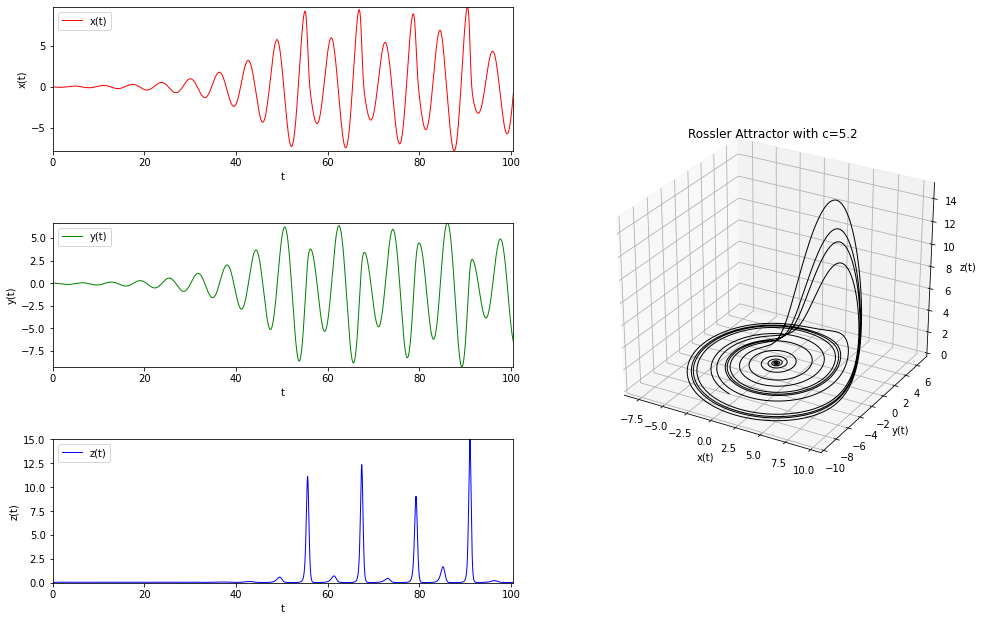

In [ ]:
#First we load some packages.
from numpy import *
from matplotlib import *
from scipy import *
from pylab import figure, show, setp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

#We define a function which is going to be the recursive function.
def num_rossler(x_n,y_n,z_n,h,a,b,c):
    x_n1=x_n+h*(-y_n-z_n)
    y_n1=y_n+h*(x_n+a*y_n)
    z_n1=z_n+h*(b+z_n*(x_n-c))   
    return x_n1,y_n1,z_n1

#Now we prepare some variables
#First the parameters
a=0.2
b=0.3
c=5.2 #c=(3, 4, 4.5,5.2)

#Them the time interval and the step size
t_ini=0
t_fin=32*pi
h=0.001
numsteps=int((t_fin-t_ini)/h)

#using this parameters we build the time.
t=numpy.linspace(t_ini,t_fin,numsteps)
#And the vectors for the solutions
x=numpy.zeros(numsteps)
y=numpy.zeros(numsteps)
z=numpy.zeros(numsteps)

#We set the initial conditions
x[0]=0
y[0]=0
z[0]=0

#This is the main loop where we use the recursive system to obtain the solution
for k in range(x.size-1):
    #We use the previous point to generate the new point using the recursion
    [x[k+1],y[k+1],z[k+1]]=num_rossler(x[k],y[k],z[k],t[k+1]-t[k],a,b,c)


#We create a figure and 4 axes on it. 3 of the axes are going to be 2D and the fourth one is a 3D plot.

fig = figure(figsize=(16, 10))
ax1 = fig.add_axes([0.1, 0.7, 0.4, 0.2])
ax2 = fig.add_axes([0.1, 0.4, 0.4, 0.2])
ax3 = fig.add_axes([0.1, 0.1, 0.4, 0.2])
ax4 = fig.add_axes([0.55, 0.25, 0.35, 0.5],projection='3d')

# And we add vectors to each plot
ax1.plot(t, x,color='red',lw=1,label='x(t)')
ax1.set_xlabel('t')
ax1.set_ylabel('x(t)')
ax1.legend()
ax1.axis((t_ini,t_fin,min(x),max(x)))

ax2.plot(t, y,color='green',lw=1,label='y(t)')
ax2.set_xlabel('t')
ax2.set_ylabel('y(t)')
ax2.legend()
ax2.axis((t_ini,t_fin,min(y),max(y)))

ax3.plot(t, z,color='blue',lw=1,label='z(t)')
ax3.set_xlabel('t')
ax3.set_ylabel('z(t)')
ax3.legend()
ax3.axis((t_ini,t_fin,min(z),max(z)))

ax4.plot(x, y,z,color='black',lw=1,label='Evolution(t)')
ax4.set_xlabel('x(t)')
ax4.set_ylabel('y(t)')
ax4.set_zlabel('z(t)')
ax4.set_title('Rossler Attractor with c=5.2')
# When finished we show the figure with all the plots.
show()


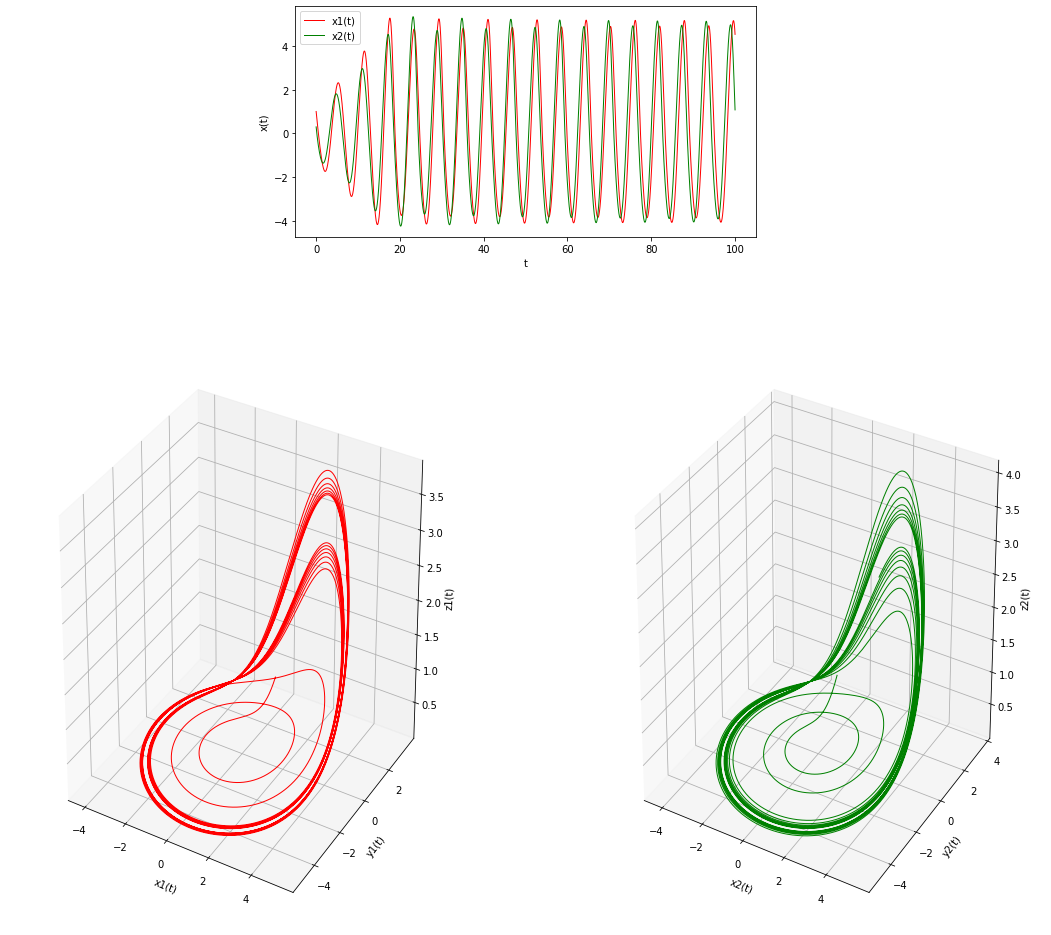

5.896143396143397
[-0.48793320573841853, -0.49673322804482034, -0.44855834093764146, -0.25054280932948825, -0.45589250468803155, -0.31293280661570744, -0.48286400315822287, -0.37250700161340716, -0.519436795034547, -0.4331726906948042, -0.5641788281803781, -0.49684516486688096, -0.6163942374342676, -0.5644862009705978, -0.6758792021986676, -0.6369533798845969]


In [ ]:
#####################################################################################################
#################### TWO OSCILLATORS ###############################################################
#####################################################################################################

##First we load some packages.
from numpy import *
from matplotlib import *
from scipy import *
from pylab import figure, show, setp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.signal import find_peaks

#We define a function which is going to be the recursive function.
def num_rossler(x1_n, y1_n, z1_n, x2_n, y2_n, z2_n, h, a, b, c, k):
    x1_n1=x1_n+h*((-y1_n)-z1_n-(k*(x2_n-x1_n))) # dx/dt = x1 + h*( - y1 - z1 + k (x2 - x1 ))
    y1_n1=y1_n+h*(x1_n + a*y1_n)
    z1_n1=z1_n+h*(b+ z1_n*(x1_n-c))   

    x2_n1=x2_n+h*((-y2_n)-z2_n-(k*(x1_n-x2_n)))
    y2_n1=y2_n+h*(x2_n+a*y2_n)
    z2_n1=z2_n+h*(b+z2_n*(x2_n-c))   

    return x1_n1, y1_n1, z1_n1, x2_n1, y2_n1, z2_n1

#Now we prepare some variables
#First the parameters
a=0.2
b=0.3
c=3
k=0.01

#Them the time interval and the step size
t_ini=0
t_fin=100
h=0.0001
numsteps=int((t_fin-t_ini)/h)

#using this parameters we build the time.
t=numpy.linspace(t_ini,t_fin,numsteps)
#And the vectors for the solutions
x1=numpy.zeros(numsteps)
y1=numpy.zeros(numsteps)
z1=numpy.zeros(numsteps)

x2=numpy.zeros(numsteps)
y2=numpy.zeros(numsteps)
z2=numpy.zeros(numsteps)

#We set the initial conditions
x1[0]=1
y1[0]=1
z1[0]=1

x2[0]=0.3
y2[0]=1
z2[0]=1

#This is the main loop where we use the recursive system to obtain the solution
for i in range(x1.size-1):
    #We use the previous point to generate the new point using the recursion
    [x1[i+1],y1[i+1],z1[i+1],x2[i+1],y2[i+1],z2[i+1]]=num_rossler(x1[i],y1[i],z1[i],x2[i],y2[i],z2[i],t[i+1]-t[i],a,b,c,k)

#Now that we have the solution in vectors t,x,y,z is time to plot them.

#We create a figure and 4 axes on it. 3 of the axes are going to be 2D and the fourth one is a 3D plot.
fig = figure(figsize=(16,16))
ax1 = fig.add_axes([0.30, 0.7, 0.4, 0.2])
ax3 = fig.add_axes([0.05, 0.1, 0.4, 0.5],projection='3d')
ax4 = fig.add_axes([0.55, 0.1, 0.4, 0.5],projection='3d')

#And we add vectors to each plot
ax1.plot(t, x1,color='red',lw=1,label='x1(t)')
ax1.set_xlabel('t')
ax1.set_ylabel('x(t)')
ax1.legend()
#ax1.axis((t_ini,t_fin))


ax1.plot(t, x2,color='green',lw=1,label='x2(t)')
ax1.set_xlabel('t')
ax1.set_ylabel('x(t)')
ax1.legend()
#ax1.axis((t_ini,t_fin))

ax4.plot(x2, y2,z2,color='green',lw=1)
ax4.set_xlabel('x2(t)')
ax4.set_ylabel('y2(t)')
ax4.set_zlabel('z2(t)')

ax3.plot(x1, y1,z1,color='red',lw=1)
ax3.set_xlabel('x1(t)')
ax3.set_ylabel('y1(t)')
ax3.set_zlabel('z1(t)')
# When finished we show the figure with all the plots.
show()

# find peaks
peakslistx1=[] #list containing the indexes of each trajectory's peaks
peakslistx1, _ = find_peaks(x1)

peakslistx2=[] #list containing the indexes of each trajectory's peaks
peakslistx2, _ = find_peaks(x2)

# obtenemos los tiempos
tx1_values=[]
for i in peakslistx1:
    t_value=t[i]
    tx1_values.append(t_value)

tx2_values=[]
for i in peakslistx2:
    t_value=t[i]
    tx2_values.append(t_value)

# diferencia de fase
periodo=[]

for i in range(len(tx1_values)):
    if i+1<len(tx1_values):
        dif=-tx1_values[i]+tx1_values[i+1]
        periodo.append(dif)

# diferencia tiempos
dif_tx_list=[]
for tx1, tx2 in zip(tx1_values, tx2_values):
    dif_tx=tx2-tx1
    dif_tx_list.append(dif_tx)

print(numpy.mean(periodo))

# eq=2*numpy.pi*t/T
phases=[]
for dif_tx, periodoi in zip(dif_tx_list, periodo):
    dif_ph=2*numpy.pi*dif_tx/periodoi
    phases.append(dif_ph)

print(phases)

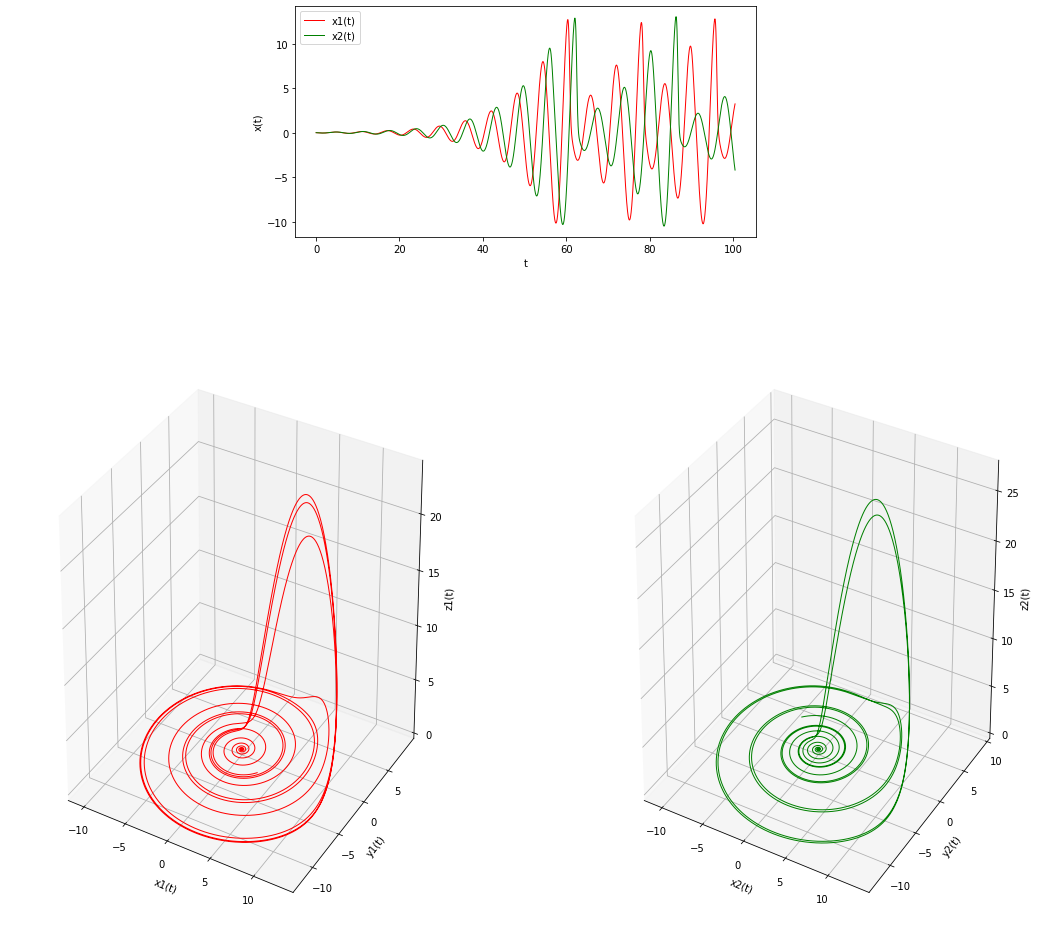

6.066123284436002
[0.13880022849713416, 0.33225178422640056, 0.5257033399556658, 0.719166458218427, 0.9125641200076092, 1.1059683268322074, 1.2995789675831928, 1.4962623621149131, 1.7074125290951092, 1.9560189725520234, 1.7188602842563585, 1.998527368003669, 2.5268713364250313, 2.750977568320074, 1.9440162077979164]


In [ ]:
#####################################################################################################
#################### TWO OSCILLATORS ###############################################################
#####################################################################################################

##First we load some packages.
from numpy import *
from matplotlib import *
from scipy import *
from pylab import figure, show, setp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.signal import find_peaks

#We define a function which is going to be the recursive function.
def num_rossler(x1_n, y1_n, z1_n, x2_n, y2_n, z2_n, h, a, b, c, w1, w2):
    x1_n1=x1_n+h*((-y1_n*w1)-z1_n) # dx/dt = x1 + h*( - y1 - z1 + k (x2 - x1 ))
    y1_n1=y1_n+h*(w1*x1_n + a*y1_n)
    z1_n1=z1_n+h*(b+ z1_n*(x1_n-c))   

    x2_n1=x2_n+h*((-y2_n*w2)-z2_n)
    y2_n1=y2_n+h*(x2_n*w2+a*y2_n)
    z2_n1=z2_n+h*(b+z2_n*(x2_n-c))   

    return x1_n1, y1_n1, z1_n1, x2_n1, y2_n1, z2_n1

#Now we prepare some variables
#First the parameters
a=0.2
b=0.3
c=7
w1 = 1.015
w2 = 0.985

#Them the time interval and the step size
t_ini=0
t_fin=32*pi
h=0.0001
numsteps=int((t_fin-t_ini)/h)

#using this parameters we build the time.
t=numpy.linspace(t_ini,t_fin,numsteps)
#And the vectors for the solutions
x1=numpy.zeros(numsteps)
y1=numpy.zeros(numsteps)
z1=numpy.zeros(numsteps)

x2=numpy.zeros(numsteps)
y2=numpy.zeros(numsteps)
z2=numpy.zeros(numsteps)

#We set the initial conditions
x1[0]=0
y1[0]=0
z1[0]=0

x2[0]=0
y2[0]=0
z2[0]=0

#This is the main loop where we use the recursive system to obtain the solution
for k in range(x1.size-1):
    #We use the previous point to generate the new point using the recursion
    [x1[k+1],y1[k+1],z1[k+1],x2[k+1],y2[k+1],z2[k+1]]=num_rossler(x1[k],y1[k],z1[k],x2[k],y2[k],z2[k],t[k+1]-t[k],a,b,c,w1,w2)

#Now that we have the solution in vectors t,x,y,z is time to plot them.

#We create a figure and 4 axes on it. 3 of the axes are going to be 2D and the fourth one is a 3D plot.
fig = figure(figsize=(16,16))
ax1 = fig.add_axes([0.30, 0.7, 0.4, 0.2])
ax3 = fig.add_axes([0.05, 0.1, 0.4, 0.5],projection='3d')
ax4 = fig.add_axes([0.55, 0.1, 0.4, 0.5],projection='3d')

#And we add vectors to each plot
ax1.plot(t, x1,color='red',lw=1,label='x1(t)')
ax1.set_xlabel('t')
ax1.set_ylabel('x(t)')
ax1.legend()
#ax1.axis((t_ini,t_fin))


ax1.plot(t, x2,color='green',lw=1,label='x2(t)')
ax1.set_xlabel('t')
ax1.set_ylabel('x(t)')
ax1.legend()
#ax1.axis((t_ini,t_fin))

ax4.plot(x2, y2,z2,color='green',lw=1)
ax4.set_xlabel('x2(t)')
ax4.set_ylabel('y2(t)')
ax4.set_zlabel('z2(t)')

ax3.plot(x1, y1,z1,color='red',lw=1)
ax3.set_xlabel('x1(t)')
ax3.set_ylabel('y1(t)')
ax3.set_zlabel('z1(t)')
# When finished we show the figure with all the plots.
show()

# find peaks
peakslistx1=[] #list containing the indexes of each trajectory's peaks
peakslistx1, _ = find_peaks(x1)

peakslistx2=[] #list containing the indexes of each trajectory's peaks
peakslistx2, _ = find_peaks(x2)

# obtenemos los tiempos
tx1_values=[]
for i in peakslistx1:
    t_value=t[i]
    tx1_values.append(t_value)

tx2_values=[]
for i in peakslistx2:
    t_value=t[i]
    tx2_values.append(t_value)

# diferencia de fase
periodo=[]

for i in range(len(tx1_values)):
    if i+1<len(tx1_values):
        dif=-tx1_values[i]+tx1_values[i+1]
        periodo.append(dif)

# diferencia tiempos
dif_tx_list=[]
for tx1, tx2 in zip(tx1_values, tx2_values):
    dif_tx=tx2-tx1
    dif_tx_list.append(dif_tx)

print(numpy.mean(periodo))

# eq=2*numpy.pi*t/T
phases=[]
for dif_tx, periodoi in zip(dif_tx_list, periodo):
    dif_ph=2*numpy.pi*dif_tx/periodoi
    phases.append(dif_ph)

print(phases)

No handles with labels found to put in legend.


[1.         0.999795   0.99959    ... 1.17911096 1.17864372 1.17817647]
[ 2.          1.999805    1.99960998 ... -3.78588637 -3.78572637
 -3.78556633]
[-1.         -1.00001    -1.00001998 ...  4.96499733  4.96437009
  0.        ]


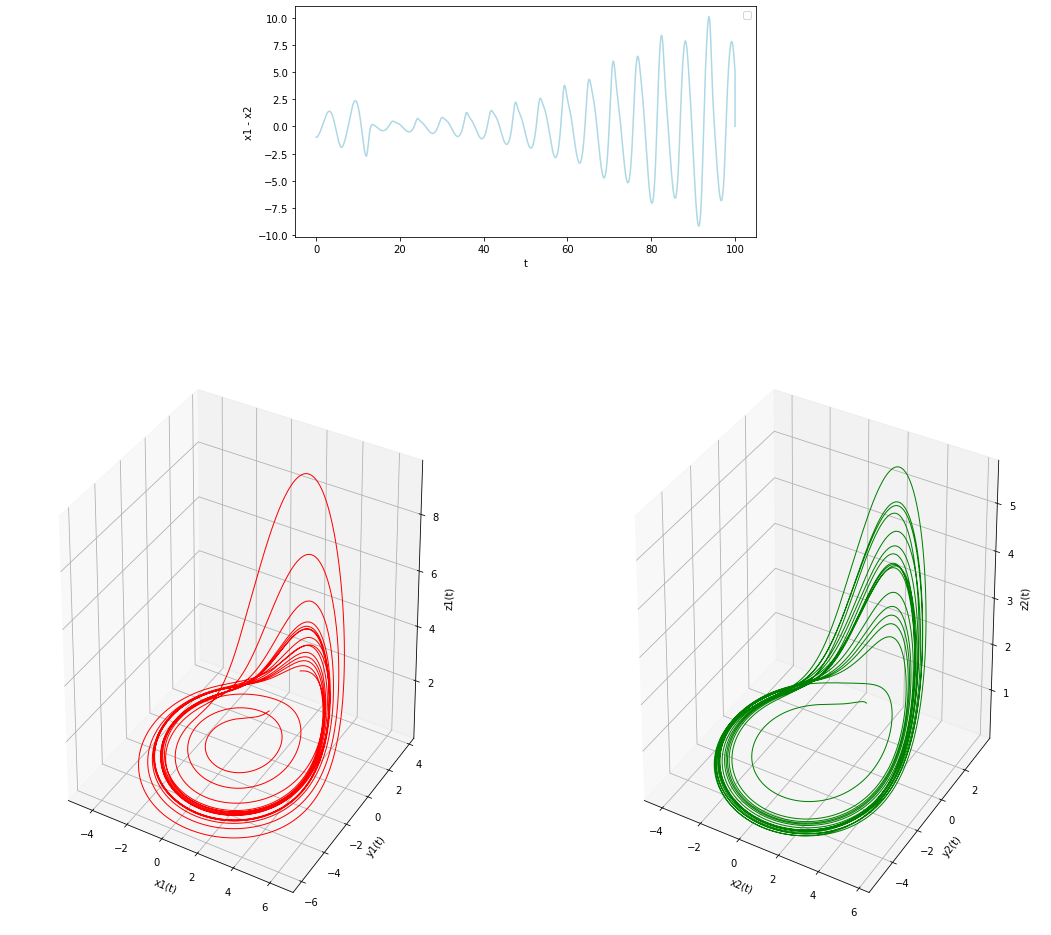

5.857837107837108
[0.4594209786087626, 0.4163648630031408, -0.1055118863989317, -0.11959607568542499, -0.1682693883605363, -0.2204834692986572, -0.2908402597910674, -0.3939419066087217, -0.5056539483052961, -0.6873710242064882, -0.8564623920479719, -1.1458211657953778, -1.3433927406870747, -1.7495386269168285, -1.8115729730566918, -2.4179231335197544]


In [ ]:
##First we load some packages.
from numpy import *
from matplotlib import *
from scipy import *
from pylab import figure, show, setp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.signal import find_peaks

#We define a function which is going to be the recursive function.
def num_rossler(x1_n, y1_n, z1_n, x2_n, y2_n, z2_n, h, a, b, c, k):
    x1_n1=x1_n+h*(-y1_n-z1_n -k*(x2_n-x1_n)) # dx/dt = x1 + h*( - y1 - z1 + k (x2 - x1 ))
    y1_n1=y1_n+h*(x1_n + a*y1_n)
    z1_n1=z1_n+h*(b+ z1_n*(x1_n-c))   

    x2_n1=x2_n+h*((-y2_n)-z2_n -k*(x1_n-x2_n))
    y2_n1=y2_n+h*(x2_n+a*y2_n)
    z2_n1=z2_n+h*(b+z2_n*(x2_n-c))   

    return x1_n1, y1_n1, z1_n1, x2_n1, y2_n1, z2_n1

#Now we prepare some variables
#First the parameters
a=0.2
b=0.3
c=3
k=0.05

#Them the time interval and the step size
t_ini=0
t_fin=100
h=0.0001
numsteps=int((t_fin-t_ini)/h)

#using this parameters we build the time.
t=numpy.linspace(t_ini,t_fin,numsteps)
#And the vectors for the solutions
x1=numpy.zeros(numsteps)
y1=numpy.zeros(numsteps)
z1=numpy.zeros(numsteps)

x2=numpy.zeros(numsteps)
y2=numpy.zeros(numsteps)
z2=numpy.zeros(numsteps)
x1x2 = numpy.zeros(numsteps)

#We set the initial conditions
x1[0]=1
y1[0]=1
z1[0]=1

x2[0]=2
y2[0]=1
z2[0]=1


#This is the main loop where we use the recursive system to obtain the solution
for i in range(x1.size-1):
    #We use the previous point to generate the new point using the recursion
    [x1[i+1],y1[i+1],z1[i+1],x2[i+1],y2[i+1],z2[i+1]]=num_rossler(x1[i],y1[i],z1[i],x2[i],y2[i],z2[i],t[i+1]-t[i],a,b,c,k)
    x1x2[i] = x1[i] - x2[i]
#Now that we have the solution in vectors t,x,y,z is time to plot them.

#We create a figure and 4 axes on it. 3 of the axes are going to be 2D and the fourth one is a 3D plot.
fig = figure(figsize=(16,16))
#ax1 = fig.add_axes([0.30, 0.7, 0.4, 0.2])
ax5 = fig.add_axes([0.30, 0.7, 0.4, 0.2])
ax3 = fig.add_axes([0.05, 0.1, 0.4, 0.5],projection='3d')
ax4 = fig.add_axes([0.55, 0.1, 0.4, 0.5],projection='3d')

#And we add vectors to each plot
#ax1.plot(t, x1,color='red',lw=1,label='x1(t)')
#ax1.set_xlabel('t')
#ax1.set_ylabel('x(t)')
#ax1.legend()
#ax1.axis((t_ini,t_fin))


#ax1.plot(t, x2,color='green',lw=1,label='x2(t)')
#ax1.set_xlabel('t')
#ax1.set_ylabel('x(t)')
#ax1.legend()
#ax1.axis((t_ini,t_fin))
print(x1)
print(x2)
print(x1x2)
ax5.plot(t, x1x2, color='lightblue')
ax5.set_xlabel('t')
ax5.set_ylabel('x1 - x2')
ax5.legend()

ax4.plot(x2, y2,z2,color='green',lw=1)
ax4.set_xlabel('x2(t)')
ax4.set_ylabel('y2(t)')
ax4.set_zlabel('z2(t)')

ax3.plot(x1, y1,z1,color='red',lw=1)
ax3.set_xlabel('x1(t)')
ax3.set_ylabel('y1(t)')
ax3.set_zlabel('z1(t)')
# When finished we show the figure with all the plots.
show()

# find peaks
peakslistx1=[] #list containing the indexes of each trajectory's peaks
peakslistx1, _ = find_peaks(x1)

peakslistx2=[] #list containing the indexes of each trajectory's peaks
peakslistx2, _ = find_peaks(x2)

# obtenemos los tiempos
tx1_values=[]
for i in peakslistx1:
    t_value=t[i]
    tx1_values.append(t_value)

tx2_values=[]
for i in peakslistx2:
    t_value=t[i]
    tx2_values.append(t_value)

# diferencia de fase
periodo=[]

for i in range(len(tx1_values)):
    if i+1<len(tx1_values):
        dif=-tx1_values[i]+tx1_values[i+1]
        periodo.append(dif)

# diferencia tiempos
dif_tx_list=[]
for tx1, tx2 in zip(tx1_values, tx2_values):
    dif_tx=tx2-tx1
    dif_tx_list.append(dif_tx)

print(numpy.mean(periodo))

# eq=2*numpy.pi*t/T
phases=[]
for dif_tx, periodoi in zip(dif_tx_list, periodo):
    dif_ph=2*numpy.pi*dif_tx/periodoi
    phases.append(dif_ph)

print(phases)


No handles with labels found to put in legend.


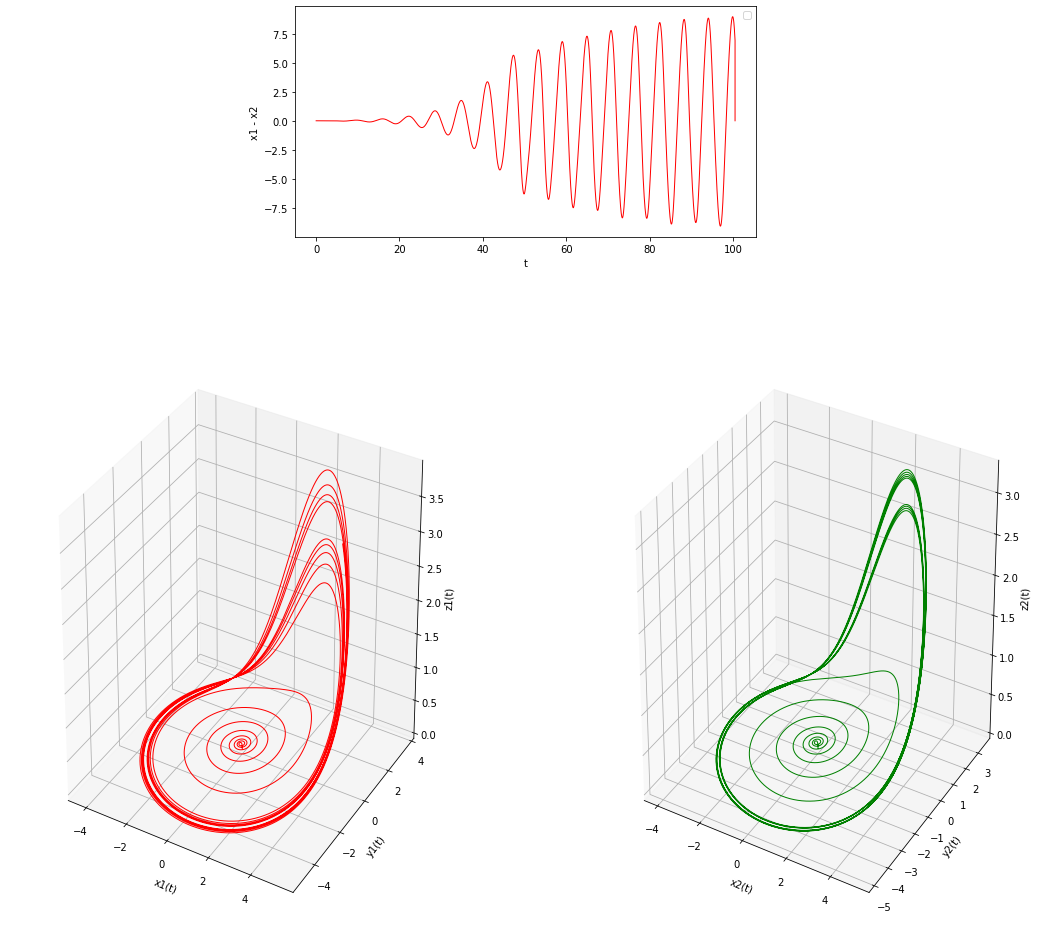

5.945447253141053
[0.13874349864556165, 0.3324490298196358, 0.5262430005254904, 0.7199155645831369, 0.9134414484979348, 1.10709327281143, 1.3011864734288974, 1.4922471114037408, 1.6120981987170924, 1.8768404586161624, 2.024200519743122, 2.2674701045681815, 2.4308695334849513, 2.6608229350139347, 2.834747061946998, 3.055816120917638]
16
15


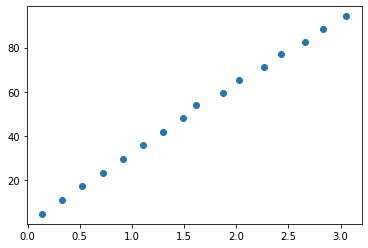

In [ ]:
#####################################################################################################
#################### TWO OSCILLATORS ###############################################################
#####################################################################################################

##First we load some packages.
from numpy import *
from matplotlib import *
from scipy import *
from pylab import figure, show, setp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.signal import find_peaks

#We define a function which is going to be the recursive function.
def num_rossler(x1_n, y1_n, z1_n, x2_n, y2_n, z2_n, h, a, b, c, w1, w2):
    x1_n1=x1_n+h*((-y1_n*w1)-z1_n) # dx/dt = x1 + h*( - y1 - z1 + k (x2 - x1 ))
    y1_n1=y1_n+h*(w1*x1_n + a*y1_n)
    z1_n1=z1_n+h*(b+ z1_n*(x1_n-c))   

    x2_n1=x2_n+h*((-y2_n*w2)-z2_n)
    y2_n1=y2_n+h*(x2_n*w2+a*y2_n)
    z2_n1=z2_n+h*(b+z2_n*(x2_n-c))   

    return x1_n1, y1_n1, z1_n1, x2_n1, y2_n1, z2_n1

#Now we prepare some variables
#First the parameters
a=0.2
b=0.3
c=3
w1 = 1.015
w2 = 0.985

#Them the time interval and the step size
t_ini=0
t_fin=32*pi
h=0.0001
numsteps=int((t_fin-t_ini)/h)

#using this parameters we build the time.
t=numpy.linspace(t_ini,t_fin,numsteps)
#And the vectors for the solutions
x1=numpy.zeros(numsteps)
y1=numpy.zeros(numsteps)
z1=numpy.zeros(numsteps)

x2=numpy.zeros(numsteps)
y2=numpy.zeros(numsteps)
z2=numpy.zeros(numsteps)

#We set the initial conditions
x1[0]=0
y1[0]=0
z1[0]=0

x2[0]=0
y2[0]=0
z2[0]=0

#This is the main loop where we use the recursive system to obtain the solution
for k in range(x1.size-1):
    #We use the previous point to generate the new point using the recursion
    [x1[k+1],y1[k+1],z1[k+1],x2[k+1],y2[k+1],z2[k+1]]=num_rossler(x1[k],y1[k],z1[k],x2[k],y2[k],z2[k],t[k+1]-t[k],a,b,c,w1,w2)
    x1x2[k] = x1[k] - x2[k]
#Now that we have the solution in vectors t,x,y,z is time to plot them.

#We create a figure and 4 axes on it. 3 of the axes are going to be 2D and the fourth one is a 3D plot.
fig = figure(figsize=(16,16))
ax1 = fig.add_axes([0.30, 0.7, 0.4, 0.2])
ax3 = fig.add_axes([0.05, 0.1, 0.4, 0.5],projection='3d')
ax4 = fig.add_axes([0.55, 0.1, 0.4, 0.5],projection='3d')

#And we add vectors to each plot
ax1.plot(t, x1x2,color='red',lw=1)
ax1.set_xlabel('t')
ax1.set_ylabel('x1 - x2')
ax1.legend()
#ax1.axis((t_ini,t_fin))



ax4.plot(x2, y2,z2,color='green',lw=1)
ax4.set_xlabel('x2(t)')
ax4.set_ylabel('y2(t)')
ax4.set_zlabel('z2(t)')

ax3.plot(x1, y1,z1,color='red',lw=1)
ax3.set_xlabel('x1(t)')
ax3.set_ylabel('y1(t)')
ax3.set_zlabel('z1(t)')
# When finished we show the figure with all the plots.
show()

# find peaks
peakslistx1=[] #list containing the indexes of each trajectory's peaks
peakslistx1, _ = find_peaks(x1)

peakslistx2=[] #list containing the indexes of each trajectory's peaks
peakslistx2, _ = find_peaks(x2)

# obtenemos los tiempos
tx1_values=[]
for i in peakslistx1:
    t_value=t[i]
    tx1_values.append(t_value)

tx2_values=[]
for i in peakslistx2:
    t_value=t[i]
    tx2_values.append(t_value)

# diferencia de fase
periodo=[]

for i in range(len(tx1_values)):
    if i+1<len(tx1_values):
        dif=-tx1_values[i]+tx1_values[i+1]
        periodo.append(dif)

# diferencia tiempos
dif_tx_list=[]
for tx1, tx2 in zip(tx1_values, tx2_values):
    dif_tx=tx2-tx1
    dif_tx_list.append(dif_tx)

print(numpy.mean(periodo))

# eq=2*numpy.pi*t/T
phases=[]
for dif_tx, periodoi in zip(dif_tx_list, periodo):
    dif_ph=2*numpy.pi*dif_tx/periodoi
    phases.append(dif_ph)

print(phases)
print(len(phases))
print(len(tx1_values[0:16]))

fig, ax = plt.subplots()
ax.scatter(phases, tx1_values[0:16])
# Mostrar el gráfico
plt.show()

5.944212610879278
[-0.03700979199751758, -0.039573396751465074, -0.059039460669367036, -0.0879699733562088, 0.05427072290021831, -0.031356932984010974, -0.26793627812991616, -0.053996456551971085, -0.15094453591490353, -0.052317714792423885, -0.3934898781919039, -0.19563261124644274, 0.29418785287271904, -0.24968111689585096, -0.09133019501424718]
5.963852630519297
[-0.038695214424711695, -0.04459737772631998, -0.07105752222508883, -0.11377164613547613, 0.06432671237517343, -0.04944805423749278, -0.40743802635098986, -0.07675097270437989, -0.17942637170034628, 0.19091626787504581, -0.16392946680334655, -0.1010925666126443, -0.46764488221672873, -0.21795595756063568, -0.05269701396808863]
5.9189859189859195
[-0.039586500459440836, -0.04740884723670593, -0.0778356762096147, -0.12931563370878243, 0.06972971546317376, -0.06139163283842767, -0.5037198446154165, -0.08199032940959984, -0.2194442040909202, 0.18751263010596084, -0.059441193445669935, -0.7918649830797534, 0.16420910323641771, -0

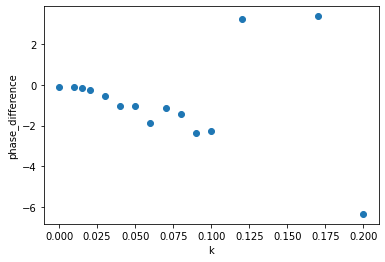

In [ ]:
##First we load some packages.
from numpy import *
from matplotlib import *
from scipy import *
from pylab import figure, show, setp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.signal import find_peaks

#We define a function which is going to be the recursive function.
def num_rossler(x1_n, y1_n, z1_n, x2_n, y2_n, z2_n, h, a, b, c, k):
    x1_n1=x1_n+h*((-y1_n)-z1_n-(k*(x2_n-x1_n))) # dx/dt = x1 + h*( - y1 - z1 + k (x2 - x1 ))
    y1_n1=y1_n+h*(x1_n + a*y1_n)
    z1_n1=z1_n+h*(b+ z1_n*(x1_n-c))   

    x2_n1=x2_n+h*((-y2_n)-z2_n-(k*(x1_n-x2_n)))
    y2_n1=y2_n+h*(x2_n+a*y2_n)
    z2_n1=z2_n+h*(b+z2_n*(x2_n-c))   

    return x1_n1, y1_n1, z1_n1, x2_n1, y2_n1, z2_n1

#Now we prepare some variables
#First the parameters
a=0.2
b=0.3
c=5.2
k=[0,0.01,0.015,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.12,0.17,0.2]
#k=[0,0.01,0.02,0.05,0.06,0.07,0.08,0.09,0.1,0.12,0.2,0.25,0.3,0.35,0.4,0.5,0.6,0.7,0.8,0.9,1]

#Them the time interval and the step size
t_ini=0
t_fin=100
h=0.0001
numsteps=int((t_fin-t_ini)/h)

#using this parameters we build the time.
t=numpy.linspace(t_ini,t_fin,numsteps)
#And the vectors for the solutions
x1=numpy.zeros(numsteps)
y1=numpy.zeros(numsteps)
z1=numpy.zeros(numsteps)

x2=numpy.zeros(numsteps)
y2=numpy.zeros(numsteps)
z2=numpy.zeros(numsteps)
x1x2 = numpy.zeros(numsteps)

#We set the initial conditions
x1[0]=1
y1[0]=1
z1[0]=1

x2[0]=1
y2[0]=1.1
z2[0]=1

phases_m = []


#This is the main loop where we use the recursive system to obtain the solution
for i in range(0,len(k)):
  for j in range(x1.size-1):
      #We use the previous point to generate the new point using the recursion
      [x1[j+1],y1[j+1],z1[j+1],x2[j+1],y2[j+1],z2[j+1]]=num_rossler(x1[j],y1[j],z1[j],x2[j],y2[j],z2[j],t[j+1]-t[j],a,b,c,k[i])
      x1x2[j] = x1[j] - x2[j]

      # find peaks
  peakslistx1=[] #list containing the indexes of each trajectory's peaks
  peakslistx1, _ = find_peaks(x1)

  peakslistx2=[] #list containing the indexes of each trajectory's peaks
  peakslistx2, _ = find_peaks(x2)

    # obtenemos los tiempos
  tx1_values=[]
  for i in peakslistx1:
    t_value=t[i]
    tx1_values.append(t_value)

  tx2_values=[]
  for i in peakslistx2:
      t_value=t[i]
      tx2_values.append(t_value)

      # diferencia de fase
  periodo=[]
  for i in range(len(tx1_values)):
    if i+1<len(tx1_values):
        dif=-tx1_values[i]+tx1_values[i+1]
        periodo.append(dif)

    # diferencia tiempos
  dif_tx_list=[]
  for tx1, tx2 in zip(tx1_values, tx2_values):
      dif_tx=tx2-tx1
      dif_tx_list.append(dif_tx)

  print(numpy.mean(periodo))

      # eq=2*numpy.pi*t/T
  phases=[]
  for dif_tx, periodoi in zip(dif_tx_list, periodo):
      dif_ph=2*numpy.pi*dif_tx/periodoi
      phases.append(dif_ph)
  phases_m.append(numpy.mean(phases))
  print(phases)


print(phases_m)
print(k)

fig, ax = plt.subplots()
ax.scatter(k, phases_m)
ax.set_xlabel('k')
ax.set_ylabel('phase_difference')
# Mostrar el gráfico
plt.show()

No handles with labels found to put in legend.


5.945447253141053
[0.13874349864556165, 0.3324490298196358, 0.5262430005254904, 0.7199155645831369, 0.9134414484979348, 1.10709327281143, 1.3011864734288974, 1.4922471114037408, 1.6120981987170924, 1.8768404586161624, 2.024200519743122, 2.2674701045681815, 2.4308695334849513, 2.6608229350139347, 2.834747061946998, 3.055816120917638]


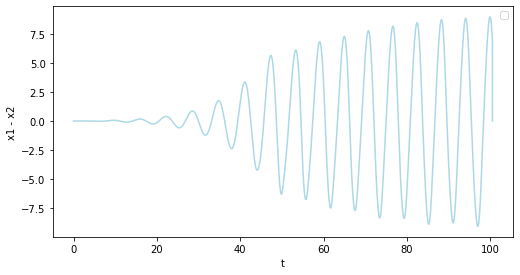

[0.13874349864556165, 0.23559626423259872, 0.3324785096635626, 0.4293377733934562, 0.5261585084143519, 0.6229809691471982, 0.7198674697588696, 0.8164149249644785, 0.9048241776036579, 1.0020258057049083, 1.0949507797083824, 1.1926607234466988, 1.2879075549881027, 1.3859729392756623, 1.4825578807870847, 1.5808865207952443]
[0.         0.         0.         ... 6.91899953 6.91829308 0.        ]


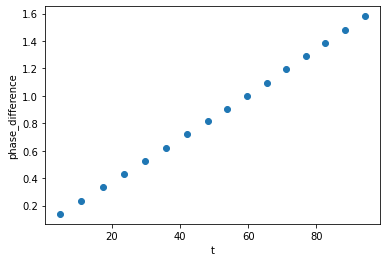

In [ ]:
##First we load some packages.
from numpy import *
from matplotlib import *
from scipy import *
from pylab import figure, show, setp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.signal import find_peaks

#We define a function which is going to be the recursive function.
def num_rossler(x1_n, y1_n, z1_n, x2_n, y2_n, z2_n, h, a, b, c, w1, w2):
    x1_n1=x1_n+h*((-y1_n*w1)-z1_n) # dx/dt = x1 + h*( - y1 - z1 + k (x2 - x1 ))
    y1_n1=y1_n+h*(w1*x1_n + a*y1_n)
    z1_n1=z1_n+h*(b+ z1_n*(x1_n-c))   

    x2_n1=x2_n+h*((-y2_n*w2)-z2_n)
    y2_n1=y2_n+h*(x2_n*w2+a*y2_n)
    z2_n1=z2_n+h*(b+z2_n*(x2_n-c))   

    return x1_n1, y1_n1, z1_n1, x2_n1, y2_n1, z2_n1

#Now we prepare some variables
#First the parameters
a=0.2
b=0.3
c=3
w1 = 1.015
w2 = 0.985

#Them the time interval and the step size
t_ini=0
t_fin=32*pi
h=0.0001
numsteps=int((t_fin-t_ini)/h)

#using this parameters we build the time.
t=numpy.linspace(t_ini,t_fin,numsteps)
#And the vectors for the solutions
x1=numpy.zeros(numsteps)
y1=numpy.zeros(numsteps)
z1=numpy.zeros(numsteps)

x2=numpy.zeros(numsteps)
y2=numpy.zeros(numsteps)
z2=numpy.zeros(numsteps)
x1x2 = numpy.zeros(numsteps)

#We set the initial conditions
x1[0]=0
y1[0]=0
z1[0]=0

x2[0]=0
y2[0]=0
z2[0]=0

phases_m = []


#This is the main loop where we use the recursive system to obtain the solution
for k in range(x1.size-1):
    #We use the previous point to generate the new point using the recursion
  [x1[k+1],y1[k+1],z1[k+1],x2[k+1],y2[k+1],z2[k+1]]=num_rossler(x1[k],y1[k],z1[k],x2[k],y2[k],z2[k],t[k+1]-t[k],a,b,c,w1,w2)
  x1x2[k] = x1[k] - x2[k]

      # find peaks
peakslistx1=[] #list containing the indexes of each trajectory's peaks
peakslistx1, _ = find_peaks(x1)

peakslistx2=[] #list containing the indexes of each trajectory's peaks
peakslistx2, _ = find_peaks(x2)

    # obtenemos los tiempos
tx1_values=[]
for i in peakslistx1:
  t_value=t[i]
  tx1_values.append(t_value)

tx2_values=[]
for i in peakslistx2:
    t_value=t[i]
    tx2_values.append(t_value)

      # diferencia de fase
periodo=[]
for i in range(len(tx1_values)):
  if i+1<len(tx1_values):
      dif=-tx1_values[i]+tx1_values[i+1]
      periodo.append(dif)

    # diferencia tiempos
dif_tx_list=[]
for tx1, tx2 in zip(tx1_values, tx2_values):
  dif_tx=tx2-tx1
  dif_tx_list.append(dif_tx)

print(numpy.mean(periodo))

      # eq=2*numpy.pi*t/T
phases=[]
for dif_tx, periodoi in zip(dif_tx_list, periodo):
  dif_ph=2*numpy.pi*dif_tx/periodoi
  phases.append(dif_ph)
  phases_m.append(numpy.mean(phases))
print(phases)
#Now that we have the solution in vectors t,x,y,z is time to plot them.

#We create a figure and 4 axes on it. 3 of the axes are going to be 2D and the fourth one is a 3D plot.
fig = figure(figsize=(16,16))
#ax1 = fig.add_axes([0.30, 0.7, 0.4, 0.2])
ax5 = fig.add_axes([0.30, 0.7, 0.4, 0.2])


ax5.plot(t, x1x2, color='lightblue')
ax5.set_xlabel('t')
ax5.set_ylabel('x1 - x2')
ax5.legend()

# When finished we show the figure with all the plots.
show()
print(phases_m)
print(x1x2)

fig, ax = plt.subplots()
ax.scatter(tx1_values[0:16], phases_m)
ax.set_xlabel('t')
ax.set_ylabel('phase_difference')
# Mostrar el gráfico
plt.show()